# **IMPORTS**

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error


In [2]:
import os

```
⠀⠀⠀⠀⠀⠀⣀⣤⡤
⠀⠀⠀⠀⢀⣾⣿⠋
⠀⠀⠀⣠⣾⣿⡟
⠀⠀⢸⠛⠉⢹⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠄⠠⣀
⠀⠀⡘⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠖⠉⠀⠀⠀⣾⣿⣦⡀
⠀⠀⡇⠀⠀⠀⢡⠄⠀⠀⣀⣀⣀⣠⠊⠀⠀⠀⠀⡠⠞⠛⠛⠛⠛⡀
⠀⠀⢃⠀⠀⠀⠀⠗⠚⠉⠉⠀⠈⠁⠀⠀⠀⢀⡔⠁⠀
⠀⠀⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣶⣄⠲⡎
⠀⠀⠀⠃⠀⠀⢠⣤⡀⠀⠀⠀⠀⣿⣿⣿⠀⠘⡄
⠀⠀⠀⡆⠀⠀⣿⣿⡇⠀⠀⠀⠀⠈⠛⠉⣴⣆⢹⡄
⠀⠀⠀⣇⢰⡧⣉⡉⠀⠀⢀⡀⠀⣀⣀⣠⣿⡷⢠⡇
⠀⠀⠀⢻⠘⠃⠈⠻⢦⠞⠋⠙⠺⠋⠉⠉⠉⢡⠟
⠀⠀⠀⠀⠳⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠋⠀⠀
```

# **SETTINGS**
---

In [3]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

In [4]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

In [5]:
# Set the max displayable columns to max
pd.set_option('display.max_columns', None)

In [6]:
# Activates XLA (for JIT compiler)
os.environ["TF_XLA_FLAGS"]= "--tf_xla_enable_xla_devices"

# Uses the right memory when using GPU
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]= "true"

# **DATA**

---

In [7]:
# data path for loading
fd001_train_path= "../data/02_processed/FD001_train.csv"
fd001_test_path=  "../data/02_processed/FD001_test.csv"
fd001_rul_path=   "../data/02_processed/FD001_RUL.csv"

In [8]:
# loading the train dataset
FD001_train= pd.read_csv(fd001_train_path)
FD001_train.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189


In [9]:
# loading the test dataset
FD001_test= pd.read_csv(fd001_test_path)
FD001_test.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,192,191
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,192,190
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,192,189


In [10]:
# loading the rul for validation
FD001_rul = pd.read_csv(fd001_rul_path)
FD001_rul.head(3)

,true_rul
0,112
1,98
2,69


# **FEATURE ENGINEERING**

---

> As far as I can tell, XGBR is the most op model, so I'll be doing this feature engineering exclusively for XGBR.

In [225]:
def drop_features(df):
  X= df.copy()
  # Features that add nothing but noise for the model !!! hard to interpret
  cols_to_drop= [
    "op_setting_1", "op_setting_2", "op_setting_3", "max_cycle",
    "sensor_measure_1", "sensor_measure_5", "sensor_measure_10",
    "sensor_measure_16", "sensor_measure_18", "sensor_measure_19"
  ]
  X = X.drop(columns=cols_to_drop, errors="ignore")
  return X

In [226]:
FD001_train_new= drop_features(FD001_train)
FD001_test_new= drop_features(FD001_test)

In [227]:
FD001_train_new[FD001_train_new["unit"] == 1]

,unit,cycle,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_17,sensor_measure_20,sensor_measure_21,RUL
0,1,1,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,643.75,1602.38,1422.78,21.61,551.94,2388.31,9037.91,48.00,519.79,2388.23,8117.69,8.5207,396,38.51,22.9588,4
188,1,189,644.18,1596.17,1428.01,21.61,550.70,2388.27,9044.55,48.08,519.58,2388.33,8117.51,8.5183,395,38.48,23.1127,3
189,1,190,643.64,1599.22,1425.95,21.61,551.29,2388.29,9040.58,48.33,520.04,2388.35,8112.58,8.5223,398,38.49,23.0675,2
190,1,191,643.34,1602.36,1425.77,21.61,550.92,2388.28,9042.76,48.15,519.57,2388.30,8114.61,8.5174,394,38.45,23.1295,1


# **TRAINING**

---

As far we want to predict in a realistic way

In [215]:
X_train= FD001_train_new.drop(["RUL"], axis=1)
y_train= FD001_train_new["RUL"]

X_test= FD001_test_new.drop(["RUL"], axis=1)
y_test= FD001_test_new["RUL"]

In [209]:
X_train

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200


In [216]:
xgbr_model = XGBRegressor(
    n_estimators=300,       # Reducir de 300 a 50
    max_depth=5,           # Árboles muy simples
    learning_rate=0.03,    # Bajar tasa de aprendizaje
    subsample=0.6,         # Mayor regularización
    colsample_bytree=0.6,  # Mayor regularización
    reg_lambda=3.0,        # Mayor regularización L2
    random_state=69
)

In [217]:
def create_sample_weights(X):
    weights = np.ones(len(X))
    for unit in X["unit"].unique():
        unit_mask = X["unit"] == unit
        last_cycles = X[unit_mask].tail(20).index  # Últimos 20 ciclos
        weights[last_cycles] = 5.0  # Pesar 5x más
    return weights
    
sample_weights = create_sample_weights(X_train)
xgbr_model.fit(X_train, y_train, sample_weight=sample_weights)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

--- xgbr TRAIN ---
MAE: 13.103517584983638
RMSE: 17.32982327687721
MSE: 300.32277480779516
R2: 0.9366990327835083

--- xgbr TEST ---
MAE: 30.471595217195603
RMSE: 39.917185201204916
MSE: 1593.3816743872928
R2: 0.6947237253189087


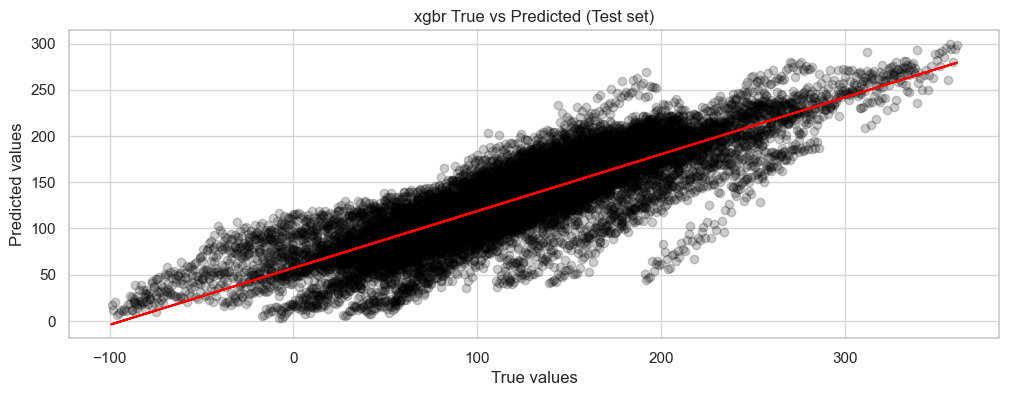

In [218]:
model_eval(xgbr_model, "xgbr", X_train, X_test, y_train, y_test)

In [219]:
evaluate_last_cycle(xgbr_model, X_test, y_test)

MAE en último ciclo: 48.96
RMSE en último ciclo: 64.57


(48.95552536010742, 64.57265474631492)

In [189]:
def model_eval(model, name, X_train, X_test, y_train, y_test):
  # Model predictions
  y_pred_train= model.predict(X_train)
  y_pred_test=  model.predict(X_test)

  # Metrics on train
  mae_train=  mean_absolute_error(y_train, y_pred_train)
  rmse_train= root_mean_squared_error(y_train, y_pred_train)
  mse_train=  mean_squared_error(y_train, y_pred_train)
  r2_train=   r2_score(y_train, y_pred_train)

  # Metrics on test
  mae_test=  mean_absolute_error(y_test, y_pred_test)
  rmse_test= root_mean_squared_error(y_test, y_pred_test)
  mse_test=  mean_squared_error(y_test, y_pred_test)
  r2_test=   r2_score(y_test, y_pred_test)

  print(f"--- {name} TRAIN ---")
  print("MAE:",  mae_train)
  print("RMSE:", rmse_train)
  print("MSE:",  mse_train)
  print("R2:",   r2_train)

  print(f"\n--- {name} TEST ---")
  print("MAE:",  mae_test)
  print("RMSE:", rmse_test)
  print("MSE:",  mse_test)
  print("R2:",   r2_test)

  # Scatter Test
  plt.figure(figsize=(12, 4))
  plt.scatter(y_test, y_pred_test, color= "black", alpha= .2)
  m, b=   np.polyfit(y_test, y_pred_test, 1)
  plt.plot(y_test, m*y_test + b, color= "red")
  plt.title(f"{name} True vs Predicted (Test set)")
  plt.xlabel("True values")
  plt.ylabel("Predicted values")
  plt.grid(True, alpha=0.8)
  plt.show()
  

In [ ]:
def evaluate_last_cycle(model, X_test, y_test):
    # Identificar últimos ciclos por unidad
    last_cycles = X_test.groupby("unit").last().index
    
    # Filtrar datos
    X_last = X_test.loc[last_cycles]
    y_last = y_test.loc[last_cycles]
    
    # Evaluar
    y_pred = model.predict(X_last)
    mae = mean_absolute_error(y_last, y_pred)
    rmse = np.sqrt(mean_squared_error(y_last, y_pred))
    
    print(f"MAE en último ciclo: {mae:.2f}")
    print(f"RMSE en último ciclo: {rmse:.2f}")
    return mae, rmse